In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values
# tüm veriler ve open verilerini alıyoruz sadece 1 indesini

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
#veriyi 0 ile 1 arasına sıkıştırıyoruz

In [6]:
#Creating a data structure with 60 timesteps and 1 output
X_train = [] #empty list
y_train = [] #empty list
#60 günü analiz edicek 3 aylık yani
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #ilk 60 gün 0 dan 59 indexe kadarı alıcak
    y_train.append(training_set_scaled[i, 0]) # 60. indexteki veriyi alıcaz
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(1198, 60)

In [9]:
# Reshaping 3D ARRAY
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1198, 60, 1)

In [11]:
# Building and training the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50)) # SON LAYER OLDUĞU İÇİN SEQUENCES DÖNDÜRMİCEK
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32) #32 BATCH

Epoch 1/100
38/38 [==============================] - 12s 104ms/step - loss: 0.0468
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0040
Epoch 13/100
38/38 [=

In [20]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


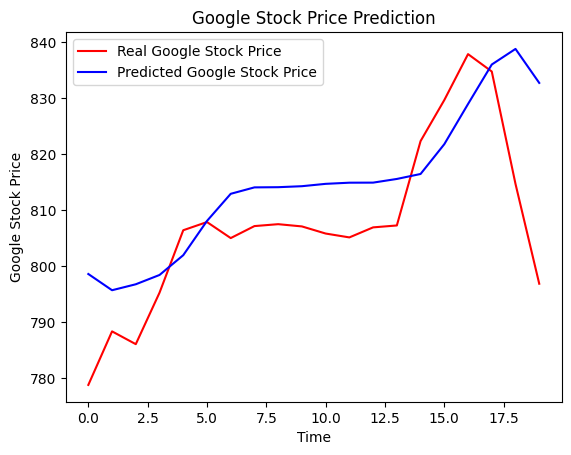

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()